In [1]:
import tess_cpm
import numpy as np
import matplotlib.pyplot as plt
import lightkurve as lk
from astropy.io import fits
from astropy.wcs import WCS

In [2]:
def cpm_periodogram(fits_file, t_row=50, t_col=50):
    cpm = tess_cpm.CPM(fits_file, remove_bad=True)
    cpm.set_target(t_row, t_col)
    cpm.set_exclusion(10)
    cpm.set_predictor_pixels(256, method='cosine_similarity')
    cpm.lsq(0.1, rescale=True, polynomials=False)
    tess_cpm.summary_plot(cpm, 10)
    aperture_lc, lc_matrix = cpm.get_aperture_lc(box=1, show_pixel_lc=True, show_aperture_lc=True)
    lc = lk.LightCurve(time=cpm.time, flux=aperture_lc)
    pg = lc.to_periodogram(oversample_factor=100)
    fig, axs = plt.subplots(2, 1, figsize=(15, 8))
    pg.plot(ax=axs[0], c='k')
    pg.plot(ax=axs[1], c='k', view='period')
    fig.suptitle("Periodogram", fontsize=20, y=0.95)
    period = pg.period_at_max_power
    print(f"Max Power Period: {period}")
    lc.fold(period.value*4).scatter()
    plt.title(f"Folded Lightcurve with Period: {period:.4f}", fontsize=20)
    return cpm

In [3]:
plt.rcParams["figure.figsize"] = (12, 8)

In [4]:
fits_file = "dwarfs/tess-s0012-3-3_169.234200_-80.464300_100x100_astrocut.fits"

In [5]:
dw = tess_cpm.Source(fits_file)

WCS Info could not be retrieved
Removing 7 bad data points (out of 1289) using the TESS provided QUALITY array


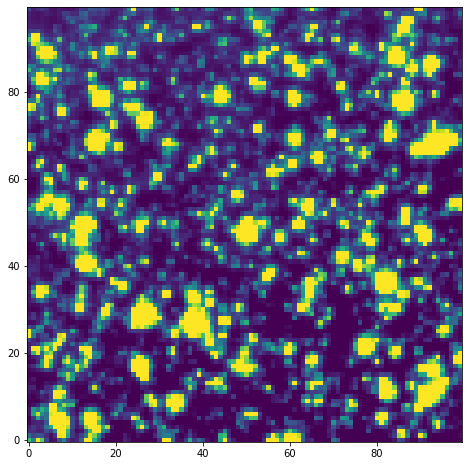

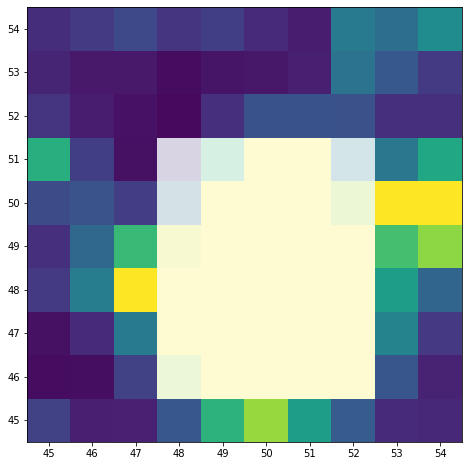

In [6]:
dw.plot_cutout()
dw.set_aperture(rowrange=[46, 52], colrange=[48, 53])
dw.plot_cutout(rowrange=[45, 55], colrange=[45, 55], show_aperture=True)

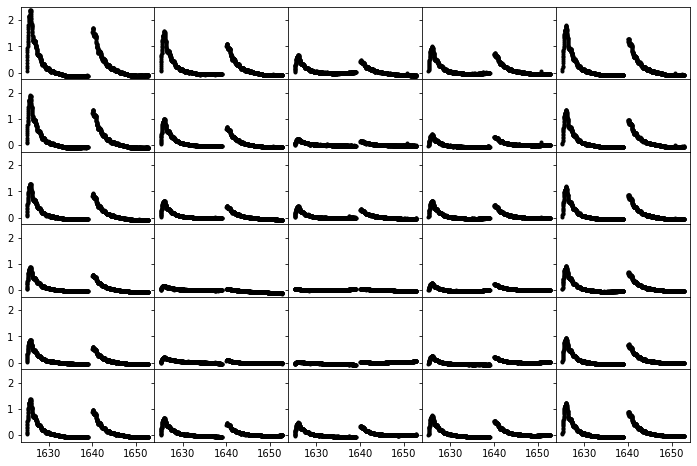

In [7]:
dw.plot_pix_by_pix()

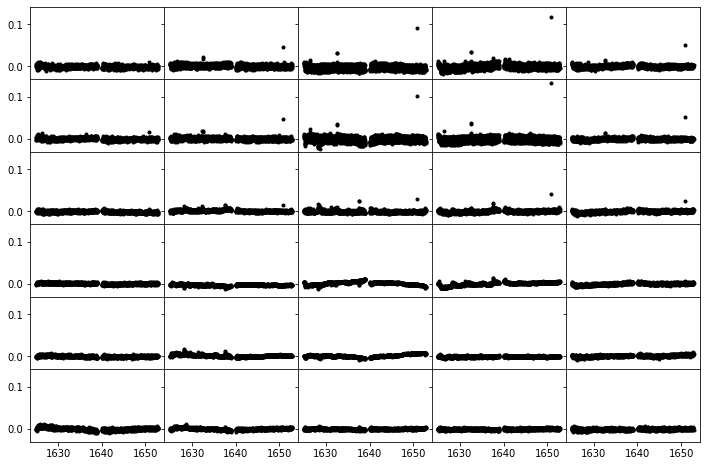

In [8]:
dw.add_cpm_model()
dw.set_regs([0.5])
dw.holdout_fit_predict(k=5)
dw.plot_pix_by_pix(data_type="cpm_subtracted_lc")

Summing over 6 x 5 pixel lightcurves


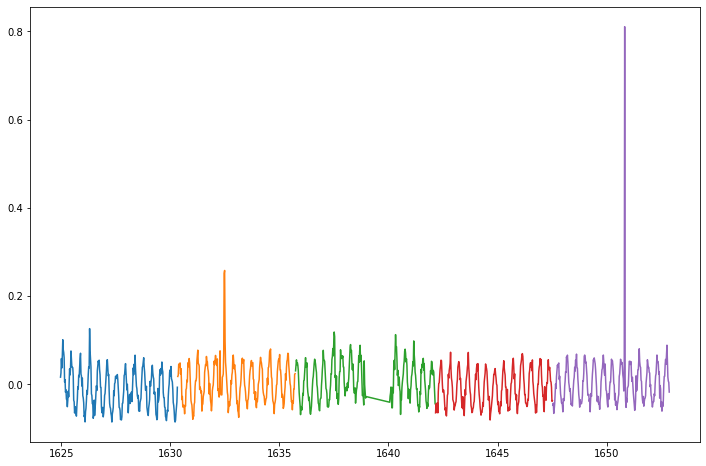

In [9]:
detrended_lc = dw.get_aperture_lc(split=True, data_type="cpm_subtracted_lc")
for time, lc in zip(dw.split_times, detrended_lc):
    plt.plot(time, lc, "-")

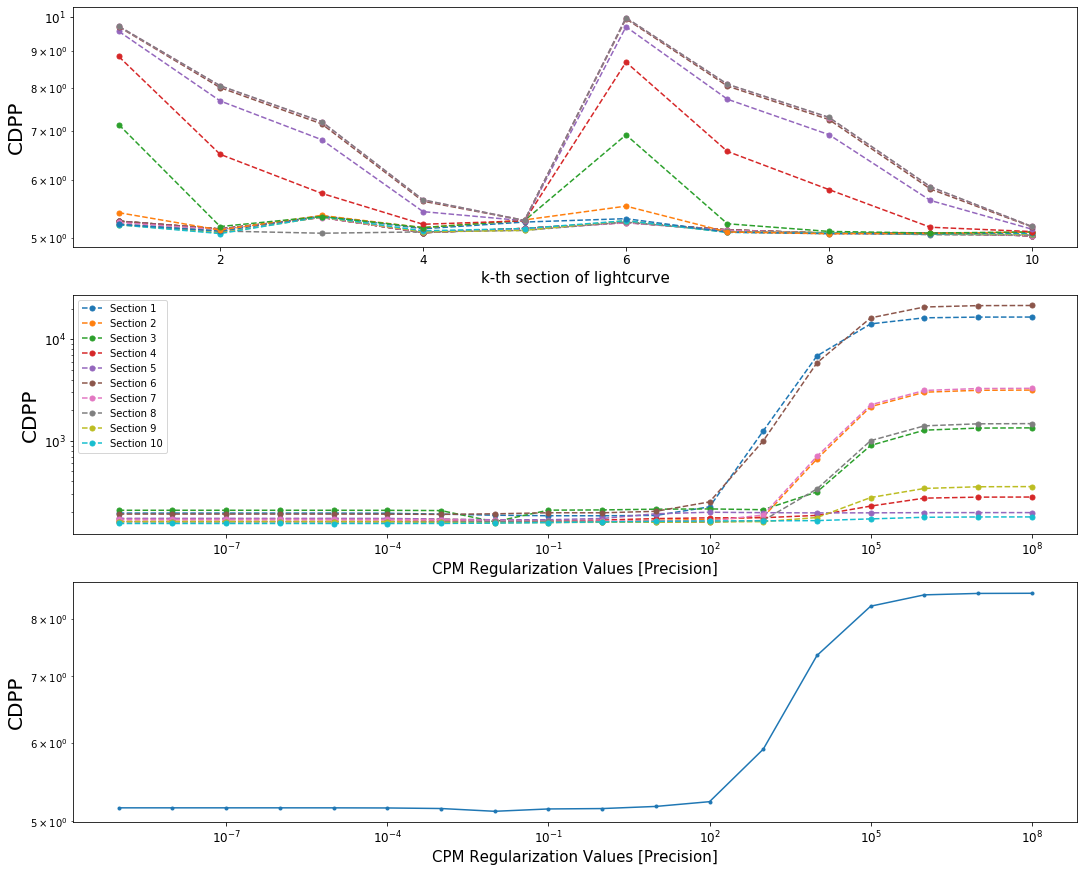

In [14]:
cpm_regs = 10.0 ** np.arange(-9, 9)
min_cdpp_reg, cdpps = dw.calc_min_cpm_reg(cpm_regs, k=10)

In [15]:
print(min_cdpp_reg)
dw.set_regs([min_cdpp_reg])
dw.holdout_fit_predict(k=10);

0.01


Summing over 6 x 5 pixel lightcurves


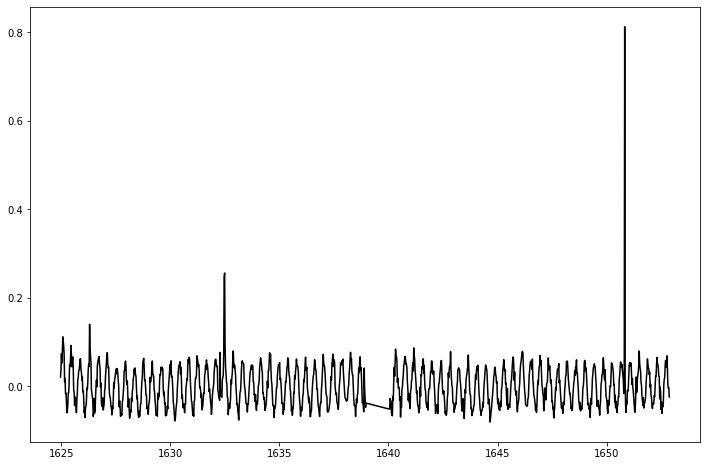

In [20]:
plt.plot(dw.time, dw.get_aperture_lc(split=False, data_type="cpm_subtracted_lc"), "-", c="k")

In [ ]:
cpm = cpm_periodogram(fits_file)

In [ ]:
c = tess_cpm.CPM(fits_file, remove_bad=True)

In [ ]:
plt.figure(figsize=(15, 12))
c.set_poly_model(1, 4, 0.5)
c.set_target_exclusion_predictors(50, 52)
c.xval(0.1);
plt.plot(cpm.time, cpm.aperture_lc / 9, color='k', alpha=0.4)

In [ ]:
# plt.figure(figsize=(12, 8))
# plt.plot(c.time, c.rescaled_target_fluxes, '.')
# n = 10
# # locs, mask = c.get_contributing_pixels(n)
# # print(c.rescaled_predictor_pixels_fluxes.shape)
# # print(locs[2])
# # plt.plot(c.time, c.rescaled_im_fluxes[:, locs[0][0], locs[0][1]], '-')
# # plt.plot(c.time, c.rescaled_predictor_pixels_fluxes[:, 4])
# for i in range(n):
#     plt.figure(figsize=(12, 8))
#     t = c.rescaled_target_fluxes
#     p = c.rescaled_predictor_pixels_fluxes[:, i]
#     plt.plot(c.time, t, '.')
#     plt.plot(c.time, p, '-', alpha=0.4)
#     plt.title(np.dot(p, t)/(np.linalg.norm(p)*np.linalg.norm(t)), fontsize=25)
#     plt.show()

In [ ]:
# plt.figure(figsize=(12, 8))
# plt.plot(c.time, c.rescaled_target_fluxes, '.')
# n = 10
# # locs, mask = c.get_contributing_pixels(n)
# # print(c.rescaled_predictor_pixels_fluxes.shape)
# # print(locs[2])
# # plt.plot(c.time, c.rescaled_im_fluxes[:, locs[0][0], locs[0][1]], '-')
# # plt.plot(c.time, c.rescaled_predictor_pixels_fluxes[:, 4])
# for i in range(n):
#     plt.figure(figsize=(12, 8))
#     t = c.rescaled_target_fluxes
#     p = c.rescaled_predictor_pixels_fluxes[:, i]
#     plt.plot(c.time, t, '.')
#     plt.plot(c.time, p, '-', alpha=0.4)
#     plt.title(np.dot(p, t)/(np.linalg.norm(p)*np.linalg.norm(t)), fontsize=25)
#     plt.show()

In [ ]:
c.lsq(0.5, rescale=True, polynomials=False)

In [ ]:
tess_cpm.summary_plot(c, 100, subtract_polynomials=False, save=False)

In [ ]:
pixel_lcs = c.get_aperture_lc(rows=np.arange(50, 52), cols=np.arange(52, 55), show_pixel_lc=True, show_aperture_lc=True)

In [ ]:
fig, axs = plt.subplots(rows.size, cols.size, sharex=True, sharey=True)
grid = np.indices((rows.size, cols.size))
for row in grid[0]:
    for col in grid[0]:
        ax = axs[row[0], col[0]]
        ax.plot(tb15.time, lc_matrix[row[0], col[0]], '-', color='black')
#         ymin, ymax = ax.get_ylim()
#         ymin, ymax
#         ax.vlines(tb15.dump_times, ymin=ymin, ymax=ymax, color="C3", alpha=0.8, label='Bad Points')
#         ax.set_ylim(ymin, ymax)
# fig.suptitle("Tabby's Star Sector 15 pixel lightcurves", fontsize=20);
# fig.tight_layout()
fig.subplots_adjust(wspace=0, hspace=0)
plt.suptitle("Tabby's Star Sector 15 (Pixel Lightcurves)", fontsize=20, y=0.93);
plt.savefig("tabby_pixel_lc_sector15.png", dpi=300)

In [ ]:
c.sigma_clip_process(sigma=3)
tess_cpm.summary_plot(c, 20, subtract_polynomials=True)

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(c.time[c.valid], c.rescaled_target_fluxes[c.valid] - c.lsq_prediction[c.valid], ".-")

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(c.time, c.rescaled_target_fluxes, ".-", color="black", label="Data")
plt.legend();

In [ ]:
c.sigma_clip(3, 3)

In [ ]:
plt.figure(figsize=(15, 6))
orig_model = np.dot(c.orig_m, c.lsq_params)
# model = np.dot(c.m, c.lsq_params)
plt.plot(c.orig_time, (c.rescaled_target_fluxes - orig_model))
# plt.plot(c.time, c.rescaled_im_fluxes[:, c.target_row, c.target_col] - model)
# plt.plot(c.orig_time, model)

In [ ]:
plt.figure(figsize=(15, 6))
orig_model = np.dot(c.orig_m, c.lsq_params)
# model = np.dot(c.m, c.lsq_params)
plt.plot(c.orig_time[~c.clipped], (c.rescaled_target_fluxes - orig_model)[~c.clipped])
# plt.plot(c.time, c.rescaled_im_fluxes[:, c.target_row, c.target_col] - model)
# plt.plot(c.orig_time, model)

In [ ]:
a = c.orig_rescaled_im_fluxes[:, c.target_row, c.target_col] - orig_model
b = c.rescaled_im_fluxes[:, c.target_row, c.target_col] - model

In [ ]:
# # plt.plot(c.orig_rescaled_im_fluxes[:, c.target_row, c.target_col][~c.clipped])
# plt.plot(c.rescaled_im_fluxes[:, c.target_row, c.target_col])
plt.plot(a[~c.clipped])
plt.plot(b)
np.allclose(a[~c.clipped], b)

In [ ]:
plt.plot(c.orig_rescaled_im_fluxes[:, c.target_row, c.target_col][~c.clipped] - c.rescaled_im_fluxes[:, c.target_row, c.target_col])

In [ ]:
c.sigma_clip(3, 2)

In [ ]:
tess_cpm.summary_plot(c, 20, subtract_polynomials=True)

In [ ]:
plt.figure(figsize=(15, 6))
orig_model = np.dot(c.orig_m, c.lsq_params)
model = np.dot(c.m, c.lsq_params)
plt.plot(c.orig_time, c.orig_rescaled_im_fluxes[:, c.target_row, c.target_col] - orig_model)
plt.plot(c.time, c.rescaled_im_fluxes[:, c.target_row, c.target_col] - model)
# plt.plot(c.orig_time, model)

In [ ]:
fits_file = "dwarfs/tess-s0006-1-3_99.153900_6.321500_100x100_astrocut.fits"

In [ ]:
d = tess_cpm.CPM(fits_file, remove_bad=True)

In [ ]:
d.set_poly_model(1, 4, 2)
d.set_target(50, 50)
d.set_exclusion(10)
d.set_predictor_pixels(256)

In [ ]:
d.lsq(0.5, rescale=True, polynomials=True)

In [ ]:
tess_cpm.summary_plot(d, 20, subtract_polynomials=False)

In [ ]:
d.sigma_clip(3, 2)
tess_cpm.summary_plot(d, 20, subtract_polynomials=True)

In [ ]:
a = (np.zeros(100) == 1)

In [ ]:
a

In [ ]:
# The below is for the Luhman 16 target mentioned by Johanna. It seems like it's
# close to the edge of the cameras, making it somewhat tricky to handle.

In [ ]:
fits_file = "dwarfs/tess-s0010-2-1_162.328812_-53.319467_100x100_astrocut.fits"
# fits_file = "dwarfs/tess-s0010-3-2_162.328812_-53.319467_100x100_astrocut.fits"

In [ ]:
d = tess_cpm.CPM(fits_file, remove_bad=True)

In [ ]:
d.set_poly_model(1, 4, 0.5)
d.set_target(50, 50)
d.set_exclusion(10)
d.set_predictor_pixels(256)

In [ ]:
d.lsq(1., rescale=True, polynomials=False)

In [ ]:
tess_cpm.summary_plot(d, 20, subtract_polynomials=False, save=False)

In [ ]:
plt.imshow(d.im_fluxes[0,:,:], origin="lower")

In [ ]:
d.pixel_medians

In [ ]:
plt.imshow(d.pixel_medians, origin="lower", vmin=np.nanpercentile(d.pixel_medians, 10), vmax=np.nanpercentile(d.pixel_medians, 90))

In [ ]:
plt.plot(d.time, d.im_fluxes[:, 50, 50], ".-")

In [ ]:
d.im_fluxes[0, :, :]

In [ ]:
x = np.array([1, 2, 3, np.nan])

In [ ]:
x

In [ ]:
x.mean()

In [ ]:
np.median(x)

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
            # if (rescale == True):
            #     self.lsq_prediction = np.median(self.target_fluxes)*(self.lsq_prediction + 1)
            #     if (polynomials == True):
            #         self.constant_prediction = np.median(self.target_fluxes)*self.poly_params[0]
            #         self.cpm_prediction = np.median(self.target_fluxes)*(self.cpm_prediction + 1)
            #         self.poly_prediction = np.median(self.target_fluxes)*(self.poly_prediction + 1) - self.constant_predictionkf = KFold(n_splits=10)
for train, test in kf.split(c.time):
    print(train)
    print(test)
    break

In [ ]:
fits_file = "dwarfs/tess-s0012-3-3_169.234200_-80.464300_100x100_astrocut.fits"
c = tess_cpm.CPM(fits_file, remove_bad=True)

In [ ]:
c.set_poly_model(1, 4, 0.5)
c.set_target(50, 51)
c.set_exclusion(10)
c.set_predictor_pixels(256, 'cosine_similarity')

In [ ]:
plt.rcParams['figure.figsize'] = (12, 8)
c.xval(0.5)